In [ ]:
import numpy
import pandas
import sys

from more_itertools.more import split_into

print(sys.executable)

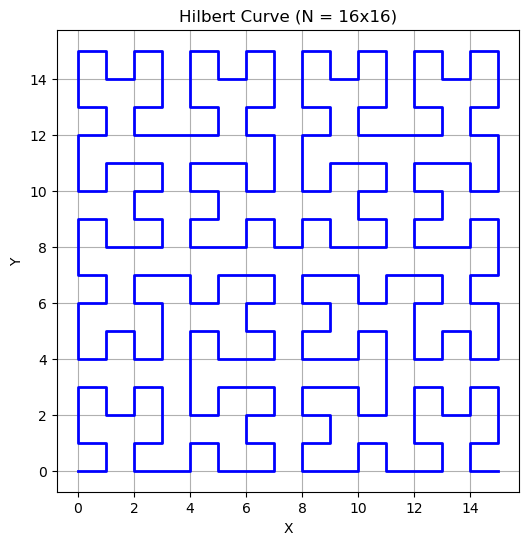

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def hilbert_curve(n):
    if n == 0:
        return np.array([[0, 0]])

    smaller_curve = hilbert_curve(n - 1)

    curve = np.vstack([
        np.column_stack([smaller_curve[:, 1], smaller_curve[:, 0]]),
        np.column_stack([smaller_curve[:, 0], smaller_curve[:, 1] + 2**(n-1)]),
        np.column_stack([smaller_curve[:, 0] + 2**(n-1), smaller_curve[:, 1] + 2**(n-1)]),
        np.column_stack([2**n - 1 - smaller_curve[:, 1], 2**(n-1) - 1 - smaller_curve[:, 0]])
    ])

    return curve

def plot_hilbert_curve(n):
    curve = hilbert_curve(n)

    # Plot the curve
    plt.figure(figsize=(6, 6))
    plt.plot(curve[:, 0], curve[:, 1], 'b-', linewidth=2)
    plt.title(f'Hilbert Curve (N = {2**n}x{2**n})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

n = 4  
plot_hilbert_curve(n)

In [ ]:
import numpy as np

def generate_hilbert_mappings(n):
    def rot(n, x, y, rx, ry):
       if ry == 0:
           if rx == 1:
               x = n - 1 - x
               y = n - 1 - y
           x, y = y, x
       return x, y

    N = 2**n
    total_points = N * N
    index_to_xy = [(0, 0)] * total_points
    xy_to_index = np.zeros((N, N), dtype=int)

    for i in range(total_points):
        x, y = 0, 0
        t = i
        for s in range(1, n + 1):
            rx = (t >> 1) & 1
            ry = (t ^ rx) & 1
            x, y = rot(2**(s - 1), x, y, rx, ry)
            x += (1 << (s - 1)) * rx
            y += (1 << (s - 1)) * ry
            t >>= 2
        index_to_xy[i] = (x, y)
        xy_to_index[x][y] = i

    return index_to_xy, xy_to_index
    
n = 3  
index_to_xy, xy_to_index = generate_hilbert_mappings(n)

index = 5
x, y = index_to_xy[index]
print(f"1D index {index} maps to 2D coordinates (x, y) = ({x}, {y})")

x, y = 3, 2
index = xy_to_index[x][y]
print(f"2D coordinates (x, y) = ({x}, {y}) maps to 1D index {index}")

In [88]:
def split_into_processors(N, N_p):
    # Divide the 1D indices into N_p segments
    points_per_processor = N // N_p
    mapping = [0] * N
    for index in range(N):
        processor = min(index // points_per_processor, N_p - 1)
        mapping[index] = processor
    return mapping

n = 5  
N_p = 3  
ind_to_processor = split_into_processors(2**n, N_p)

print(ind_to_processor)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


<Figure size 700x700 with 0 Axes>

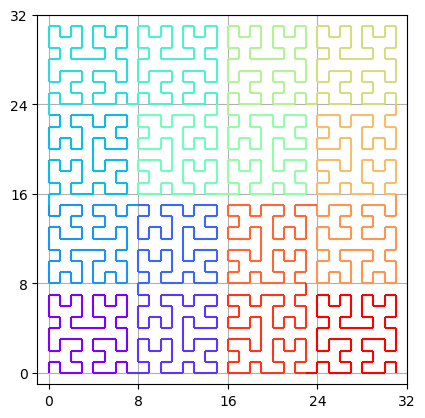

In [97]:
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

def plot_hilbert_mapping(n, N_p):
    N = 2**n
    curve, xy_to_index = generate_hilbert_mappings(n)
    assert(len(set(curve)) == len(curve))

    proc_map_1d = split_into_processors(N*N, N_p)
    proc_map_2d = [proc_map_1d[xy_to_index[point]] for point in curve]
    
    segments = np.array([curve[:-1], curve[1:]]).transpose(1, 0, 2)

    segment_values = proc_map_2d[1:]  

    cmap = plt.get_cmap('rainbow')

    plt.figure(figsize=(7, 7))
    norm = plt.Normalize(vmin=min(proc_map_1d), vmax=max(proc_map_1d))
    segment_colors = cmap(norm(segment_values))  

    lc = LineCollection(segments, colors=segment_colors)

    fig, ax = plt.subplots()
    ax.add_collection(lc)

    ax.set_xlim(-1, N)
    ax.set_xticks(range(0, N+1, 8))
    ax.set_yticks(range(0, N+1, 8))
    ax.set_ylim(-1, N)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')

plot_hilbert_mapping(5, 16)